# Task 03 - Data Analysis & Visualization

## 1. Explore the dataset

### a. How will you examine the structure of the dataset and understand the meaning of the attributes?

In [36]:
# Importing all the required libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [3]:
# Reading the dataset from the local folder

df = pd.read_excel (r"C:\Users\user\Documents\RedwingLabs\onlineretail\Online Retail.xlsx")
print (df)

       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

In [5]:
# Exploring the structure af the dataset

# Checking the number of rows and columns
print("Dataset dimensions:", df.shape)
print()
print("--------------------------------------------------------------------------------")
print()

# Let's have a look at the first few rows to get a rough understanding of the dataset
print("Sample data:")
print(df.head())
print()
print("--------------------------------------------------------------------------------")
print()

# Inspecting the attribute names that also provides us with few exploratory information
print("Attribute names:", df.columns)
print()
print("--------------------------------------------------------------------------------")
print()

# Check attribute types
print("Attribute data types:")
print(df.dtypes)

Dataset dimensions: (541909, 8)

--------------------------------------------------------------------------------

Sample data:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  

------------------------------------------------------------

<div class="observation">
    <h3 class="observation-heading">Observations</h3>
    <ul class="observation-list">
        <li class="observation-item">The given dataset has 541909 rows and 8 columns.</li>
        <li class="observation-item">The Sample data thus observed gives us a fair idea as to how the attributes values are represented and the format that have been used to represent them, which will be useful for further analysis.</li>
        <li class="observation-item">The attribute names alone makes it pretty clear the attribute types in the dataset.</li>
        <li class="observation-item">The attribute data types have been thus displayed. Now this makes very clear as to what each and every attribute represents and how can they be handled.</li>
    </ul>
</div>

### b. How will you identify any missing values, outliers or any other issues that need to be addressed before analysis?

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Display the results
print("Missing values:")
print(missing_values)
print("\nMissing value percentages:")
print(missing_percentage)

Missing values:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Missing value percentages:
InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64


<div class="observation">
    <h3 class="observation-heading">Observations</h3>
    <ul class="observation-list">
        <li class="observation-item">Missing Values exist for only two columns - Description and CustomerID column</li>
        <li class="observation-item">Description attribute is a nominal attribute that simply describes the product at hand</li>
        <li class="observation-item">The CustomerID column also has quite some number of missing values to be exact ~25%, and this is a unique float64 values assigned uniquely to each customer.</li>
        <li class="observation-item">It doesn't make much sense to impute these missing values as description is not a constinuous or a categorical variable, where we could have taken mean or mode and the missing values are anyways quite less in number</li>
        <li class="observation-item">Since CustomerID also belongs uniquely to each customer it makes very less sense to generate customerID on our own. So before we see any correlations among the attributes, imputing CustomerID values can introduce errors or false associations.</li>
        <li class="observation-item">Hence we drop the missing column values</li>
    </ul>
</div>

In [7]:
# Droping rows having missing values

df = df.dropna()
df.shape

(406829, 8)

In [8]:
# In order to get an idea about the presence of an outlier in the dataset let's consider the descriptive statistics of the data

print("Descriptive statistics:")
print(df.describe())

Descriptive statistics:
            Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000


<div class="observation">
    <h3 class="observation-heading">Observations</h3>
    <ul class="observation-list">
        <li class="observation-item">The difference between the mean value of the Quantity and UnitPrice attributes compared to their max values is huge. This signifies the presence of outliers. Infact the max value of both the Quantity and UnitPrice is an outlier here. This may possibly be due to some human error.</li>
        <li class="observation-item">It is also quite clear that the data columns do not conform to a standard scale.</li>
        <li class="observation-item">The scale of CustomerID column is quite high than compared to the other columns. We need to either normalize or standardize the data.</li>
    </ul>
</div>

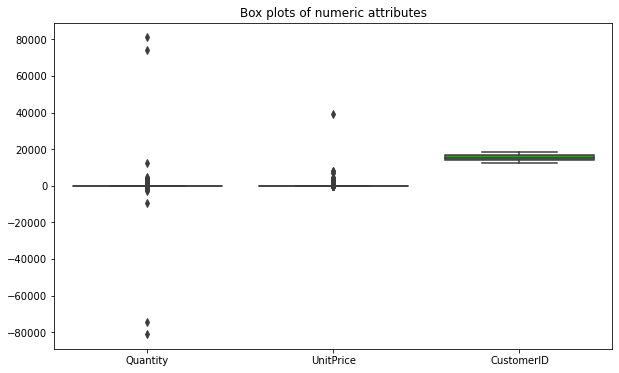

In [9]:
# Creating box plots for numeric attributes to detect presence of any outliers

numeric_cols = ['Quantity', 'UnitPrice', 'CustomerID']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[numeric_cols])
plt.title('Box plots of numeric attributes')
plt.show()

<div class="observation">
    <h3 class="observation-heading">Observations</h3>
    <ul class="observation-list">
        <li class="observation-item">The presence of outliers are quite evident but because of the huge variability in the scale of the attributes the box plots are not very pleasing to conclude anything. Neverthless the outlier points are quite evident for the Quantity and the UnitPrice attributes.</li>
        <li class="observation-item">So, we will get the scales of the attributes to the similar scale and visualize once again later.</li>
    </ul>
</div>

In [10]:
# Let's use IQR(Inter Quartile Range to identify the outliers)

# A function that outputs outlier values
def find_outliers_IQR(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    
    IQR = q3 - q1

    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

In [11]:
# Outliers in Quantity attribute

quantity_outliers = find_outliers_IQR(df["Quantity"])
print(f"Number of Quantity Outliers {len(quantity_outliers)}")
print(f"Max Outlier Value {quantity_outliers.max()}")
print(f"Number of Quantity Outliers {quantity_outliers.min()}")

Number of Quantity Outliers 26682
Max Outlier Value 80995
Number of Quantity Outliers -80995


In [12]:
# Outliers in UnitPrice attribute

unitprice_outliers = find_outliers_IQR(df["UnitPrice"])
print(f"Number of UnitPrice Outliers {len(unitprice_outliers)}")
print(f"Max Outlier Value {unitprice_outliers.max()}")
print(f"Number of UnitPrice Outliers {unitprice_outliers.min()}")

Number of UnitPrice Outliers 36051
Max Outlier Value 38970.0
Number of UnitPrice Outliers 7.6


In [13]:
# Outliers in Quantity attribute

customerid_outliers = find_outliers_IQR(df["CustomerID"])
print(f"Number of CustomerID Outliers {len(customerid_outliers)}")
print(f"Max Outlier Valye {customerid_outliers.max()}")
print(f"Number of CustomerID Outliers {customerid_outliers.min()}")

Number of CustomerID Outliers 0
Max Outlier Valye nan
Number of CustomerID Outliers nan


In [14]:
# The size of the datasset is so huge that we can afford to drop the outliers

def drop_outliers_IQR(df):
    numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

    for column in numeric_columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1

        lower_threshold = q1 - 1.5 * IQR
        upper_threshold = q3 + 1.5 * IQR

        df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]

    outliers_dropped = df.reset_index(drop=True)
    return outliers_dropped

In [15]:
# Call the function and store the resulting DataFrame
df = drop_outliers_IQR(df)

# Display the modified DataFrame without outliers
print("DataFrame without outliers:")
print(df.head())

DataFrame without outliers:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


### c. How will you select the programming language and necessary tools and libraries for analysis and visualization?

# 2. Analyze The Dataset

### a. What are the most popular product categories based on the number of orders or total revenue?

In [43]:
# Number of Orders per Product Category

orders_per_category = df.groupby('Description')['InvoiceNo'].nunique().sort_values(ascending=False)
print(orders_per_category)

Description
WHITE HANGING HEART T-LIGHT HOLDER    1661
JUMBO BAG RED RETROSPOT               1347
PARTY BUNTING                         1273
LUNCH BAG RED RETROSPOT               1216
SET OF 3 CAKE TINS PANTRY DESIGN      1177
                                      ... 
GREEN/BLUE CERAMIC CANDLE HOLDER         1
PURPLE/BLUE CERAMIC CANDLE HOLDER        1
PURPLE/TURQ FLOWERS HANDBAG              1
WALL ART,ONLY ONE PERSON                 1
CHERRY BLOSSOM PURSE                     1
Name: InvoiceNo, Length: 3598, dtype: int64


In [45]:
# Total Revenue per Product Category

df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
revenue_per_category = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False)
print(revenue_per_category)

Description
PARTY BUNTING                         34672.80
WHITE HANGING HEART T-LIGHT HOLDER    31515.91
JUMBO BAG RED RETROSPOT               24703.14
SPOTTY BUNTING                        23401.60
ASSORTED COLOUR BIRD ORNAMENT         23053.29
                                        ...   
PINK CHERRY LIGHTS                      -27.00
CERAMIC CAKE STAND + HANGING CAKES      -33.75
VICTORIAN SEWING BOX MEDIUM             -48.65
WHITE CHERRY LIGHTS                     -54.00
POSTAGE                                -138.03
Name: TotalPrice, Length: 3598, dtype: float64


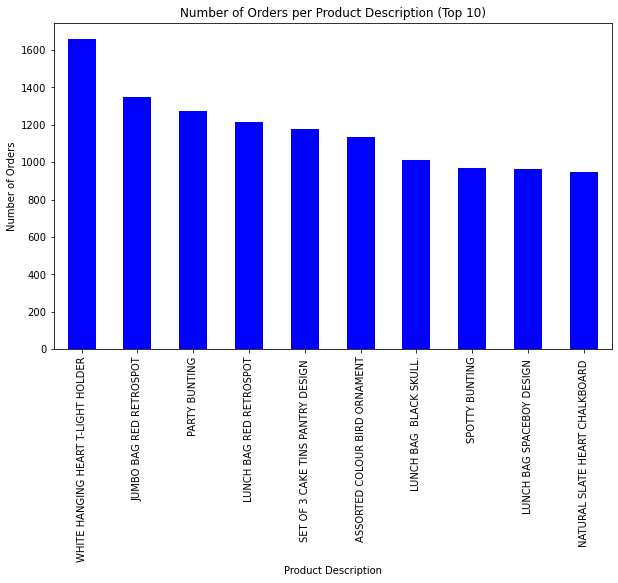

In [44]:
# Bar plot for Number of Orders per Product Category
plt.figure(figsize=(10, 6))
orders_per_category.head(10).plot(kind='bar', color='blue')
plt.xlabel('Product Description')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Product Description (Top 10)')
plt.xticks(rotation=90)
plt.show()

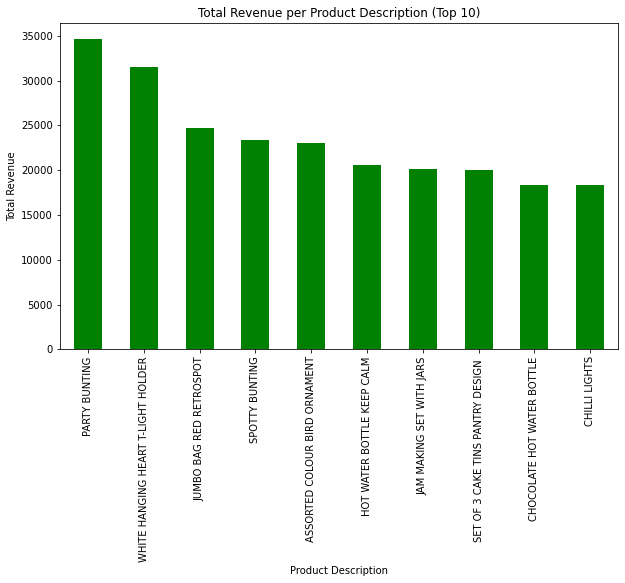

In [46]:
# Bar plot for Total Revenue per Product Category
plt.figure(figsize=(10, 6))
revenue_per_category.head(10).plot(kind='bar', color='green')
plt.xlabel('Product Description')
plt.ylabel('Total Revenue')
plt.title('Total Revenue per Product Description (Top 10)')
plt.xticks(rotation=90)
plt.show()

### b. Are there any seasonal trends in customer purchasing behavior?

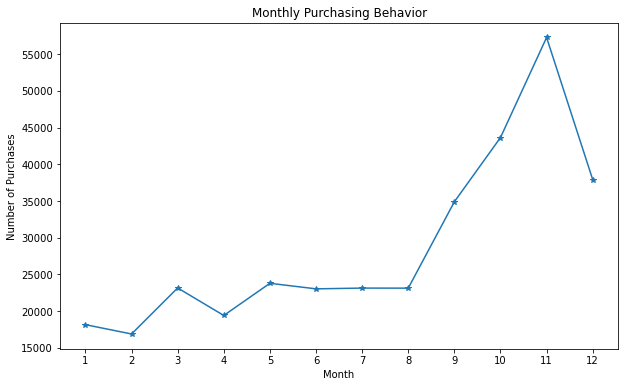

In [47]:
# The following code concerns with the montkly purchase bahviours occured

df['Month'] = df['InvoiceDate'].dt.month

# Analyzing the Purchasing Behavior on a monthly basis
monthly_purchases = df.groupby('Month')['InvoiceNo'].count()

# Finally visualizing the Results
plt.figure(figsize=(10, 6))
monthly_purchases.plot(kind='line', marker='*')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Monthly Purchasing Behavior')
plt.xticks(range(1, 13))
plt.show()

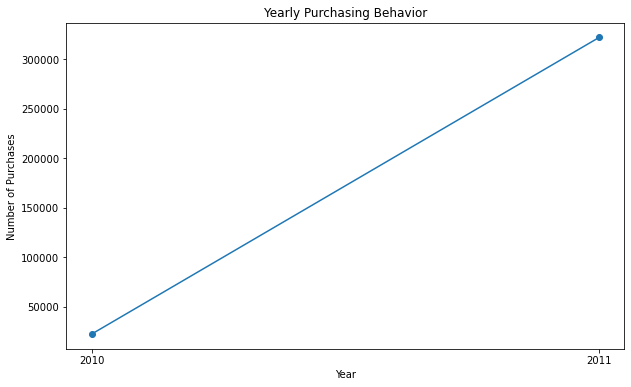

In [21]:
# Let's see if there are any interesting yearly trend patterns

df['Year'] = df['InvoiceDate'].dt.year

# Analyzing the Purchasing Behavior
yearly_purchases = df.groupby('Year')['InvoiceNo'].count()

# Visualizing the Results
plt.figure(figsize=(10, 6))
yearly_purchases.plot(kind='line', marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Purchases')
plt.title('Yearly Purchasing Behavior')
plt.xticks(df['Year'].unique())
plt.show()

### c. Is there a correlation between the quantity of items ordered and their unit price?

In [22]:
# Calculating the Correlation Coefficient
correlation = df['Quantity'].corr(df['UnitPrice'])

# Threby Printing the Correlation Coefficient
print("Correlation coefficient between Quantity and UnitPrice:", correlation)

Correlation coefficient between Quantity and UnitPrice: -0.3403536810951739


<div class="observation">
    <h3 class="observation-heading">Observations</h3>
    <ul class="observation-list">
        <li class="observation-item">There doesn't seem to appear much positive or negative correlation between the quantity of items ordered and their unit price, the correlation coefficient is -0.3403536810951739.</li>
        <li class="observation-item">A positive value close to 1 means as the item quantity increases their unit price increases as well, a strong positive correlation.</li>
        <li class="observation-item">A negative value close to -1 indicates a strong negative correlation, implying that as the quantity increases, the unit price tends to decrease.</li>
        <li class="observation-item">A correlation value close to 0 simply means no correlation or very little correlation among the attributes</li>
    </ul>
</div>

### d. Are there any significant differences in customer spending based on different demographic attributes (e.g. age, location)?

Summary statistics of customer spending by country:
count    3.700000e+01
mean     1.154025e+05
std      5.996124e+05
min      1.311700e+02
25%      1.440900e+03
50%      4.815620e+03
75%      1.556390e+04
max      3.658928e+06
Name: TotalPrice, dtype: float64


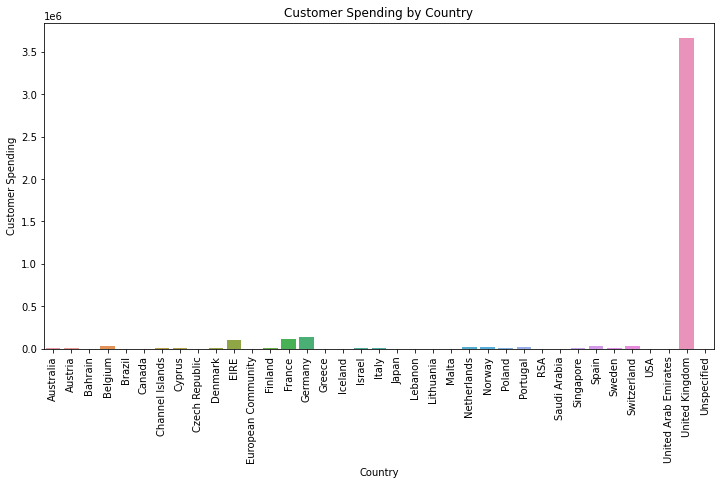

In [23]:
grouped_spending = df.groupby('Country')['TotalPrice'].sum().reset_index()

# Analyzing Customer Spending
print("Summary statistics of customer spending by country:")
print(grouped_spending['TotalPrice'].describe())

# Visualizing the Results
plt.figure(figsize=(12, 6))
sns.barplot(x='Country', y='TotalPrice', data=grouped_spending)
plt.xlabel('Country')
plt.ylabel('Customer Spending')
plt.title('Customer Spending by Country')
plt.xticks(rotation=90)
plt.show()

# 3. Visualize the Dataset 

## Create visualizations to effectively communicate your findings. Ensure that the visualizations accurately represent the data and are visually appealing.

### a. Consider the types of visualization and suitability for different types of data attributes - such as bar charts, line charts, scatter plots, or heatmaps

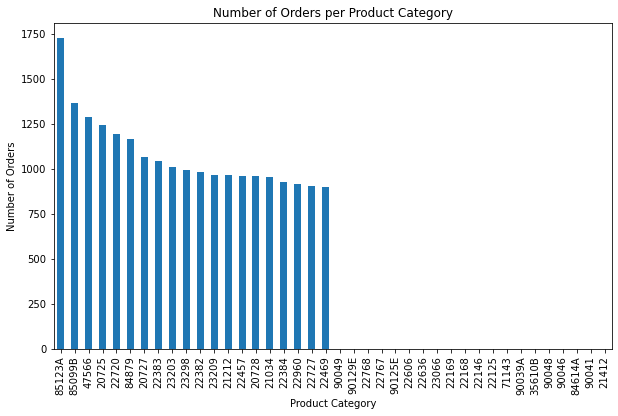

In [29]:
# Let's consider a bar plot of orders per product category

# Here we are counting the number of orders per product category
# The specific product has been identified based on it's stock code
# We are sorting so that we can take only the maximum and minimum orderes items
# Else plotting order of every item is not feasible

orders_per_category = df['StockCode'].value_counts().sort_values(ascending=False)

# Selecting top 20 and last 20 orders
top_20_orders = orders_per_category.head(20)
last_20_orders = orders_per_category.tail(20)

# Concatenating the top 20 and the last 20 orders
selected_orders = pd.concat([top_20_orders, last_20_orders])

# Now let's create a bar plot
plt.figure(figsize=(10, 6))
# orders_per_category.plot(kind='bar')
selected_orders.plot(kind = 'bar')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Product Category')
plt.xticks(rotation=90)
plt.show()

In [30]:
# Now let's print the stock code of the top 20 and last 20 items and their order amount

for stock_code, order_count in selected_orders.items():
    print(f"Stock Code: {stock_code}\tOrder Count: {order_count}")

Stock Code: 85123A	Order Count: 1724
Stock Code: 85099B	Order Count: 1365
Stock Code: 47566	Order Count: 1290
Stock Code: 20725	Order Count: 1244
Stock Code: 22720	Order Count: 1191
Stock Code: 84879	Order Count: 1168
Stock Code: 20727	Order Count: 1067
Stock Code: 22383	Order Count: 1042
Stock Code: 23203	Order Count: 1009
Stock Code: 23298	Order Count: 991
Stock Code: 22382	Order Count: 983
Stock Code: 23209	Order Count: 968
Stock Code: 21212	Order Count: 966
Stock Code: 22457	Order Count: 961
Stock Code: 20728	Order Count: 959
Stock Code: 21034	Order Count: 954
Stock Code: 22384	Order Count: 929
Stock Code: 22960	Order Count: 918
Stock Code: 22727	Order Count: 905
Stock Code: 22469	Order Count: 899
Stock Code: 90049	Order Count: 1
Stock Code: 90129E	Order Count: 1
Stock Code: 22768	Order Count: 1
Stock Code: 22767	Order Count: 1
Stock Code: 90125E	Order Count: 1
Stock Code: 22606	Order Count: 1
Stock Code: 22636	Order Count: 1
Stock Code: 23066	Order Count: 1
Stock Code: 22169	Order

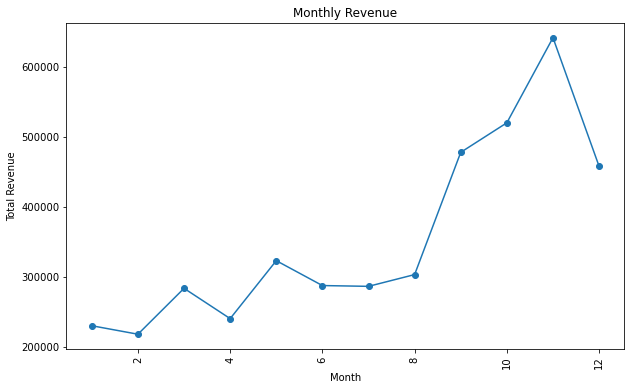

In [33]:
# Let's plot monthly total revenue for each product

# Analyzing the total sales on a monthly basis
monthly_revenue = df.groupby('Month')['TotalPrice'].sum()

# Plotting a line chart
plt.figure(figsize=(10, 6))
monthly_revenue.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.title('Monthly Revenue')
plt.xticks(rotation=90)
plt.show()

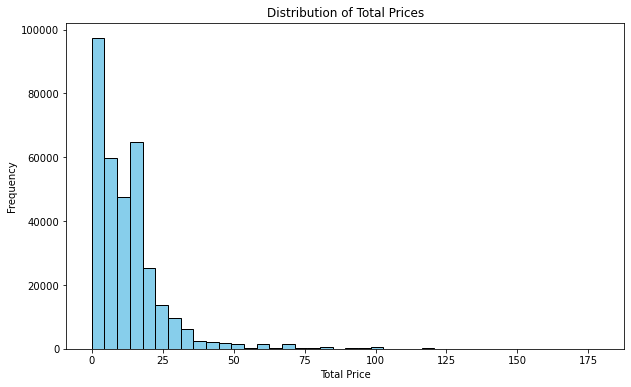

In [60]:
# Plot a histogram of total prices

# First let's filter out the negative TotalPrice elements
filtered_df = df[df['TotalPrice'] >= 0]

plt.figure(figsize=(10, 6))
plt.hist(filtered_df['TotalPrice'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Total Price')
plt.ylabel('Frequency')
plt.title('Distribution of Total Prices')
plt.show()

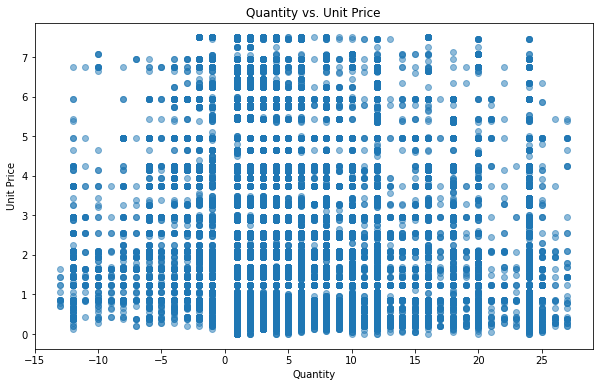

In [34]:
# Now lets create a scatter plot of unit price versus quantity 
# to determine how the unit price of an item affects the quantity sold

plt.figure(figsize=(10, 6))
plt.scatter(df['Quantity'], df['UnitPrice'], alpha=0.5)
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Quantity vs. Unit Price')
plt.show()

<AxesSubplot:>

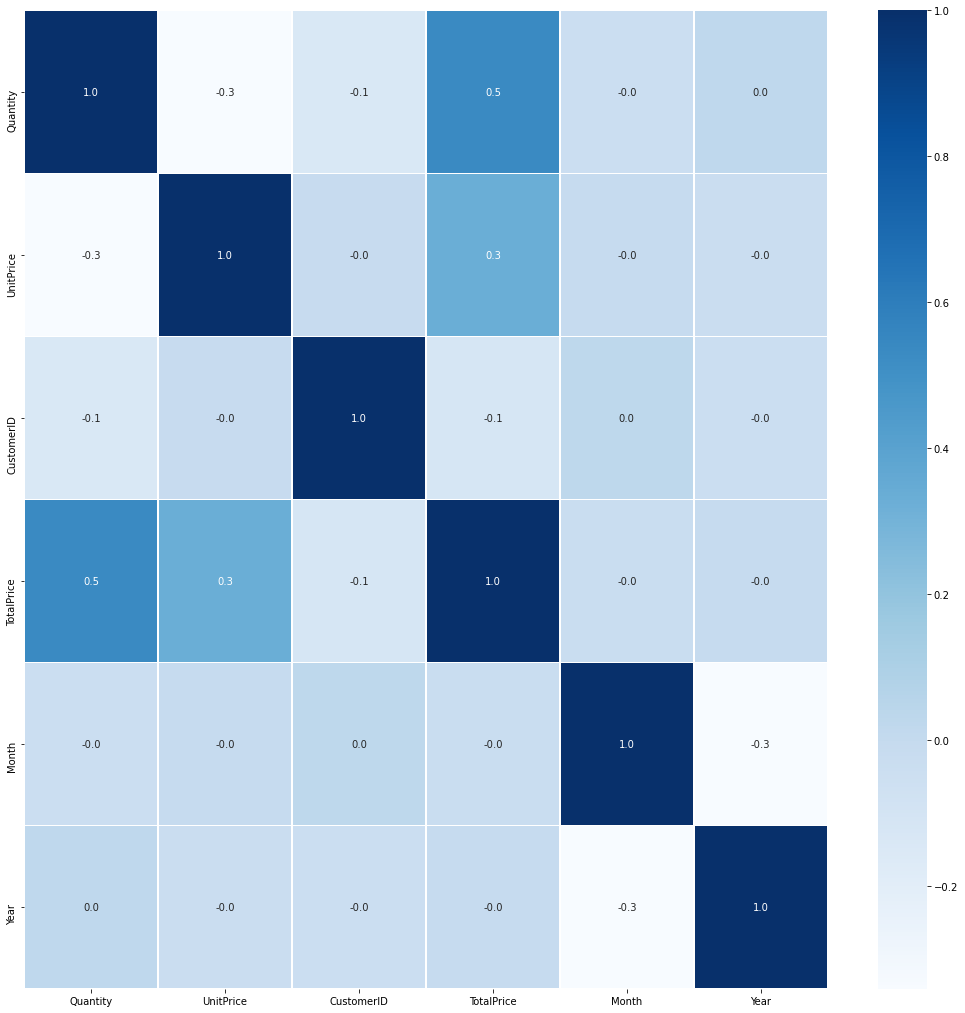

In [35]:
# Plotting the heatmap to determine the correlation among the attributes

f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap = "Blues")

<div class="observation">
    <h3 class="observation-heading">Observations</h3>
    <ul class="observation-list">
        <li class="observation-item">There doesn't seem to appear major correlation among the attribute values. The max correlation being among the Quantity and TotalPrice attribute with a value of 0.5.</li>
    </ul>
</div>